# **Install depenencies**

In [ ]:
!pip install mediapipe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **definition des fonctions**

In [ ]:
#détection de caractéristiques dans une image
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [ ]:
#prend les résultats de la détection d'une pose effectuée à l'aide de MediaPipe et extrait certaines valeurs spécifiques des points clés détectés
def extract_Values(results):
    keypoints = []
    # Nose
    keypoints.extend([results.pose_landmarks.landmark[0].x, results.pose_landmarks.landmark[0].y])
    # Left, Right eye (inner, center, outer)
    keypoints.extend([results.pose_landmarks.landmark[1].x, results.pose_landmarks.landmark[1].y])
    keypoints.extend([results.pose_landmarks.landmark[2].x, results.pose_landmarks.landmark[2].y])
    keypoints.extend([results.pose_landmarks.landmark[3].x, results.pose_landmarks.landmark[3].y])
    keypoints.extend([results.pose_landmarks.landmark[4].x, results.pose_landmarks.landmark[4].y])
    keypoints.extend([results.pose_landmarks.landmark[5].x, results.pose_landmarks.landmark[5].y])
    keypoints.extend([results.pose_landmarks.landmark[6].x, results.pose_landmarks.landmark[6].y])
    # Left, Right ear
    keypoints.extend([results.pose_landmarks.landmark[7].x, results.pose_landmarks.landmark[7].y])
    keypoints.extend([results.pose_landmarks.landmark[8].x, results.pose_landmarks.landmark[8].y])
    # Mouth (left, Right)
    keypoints.extend([results.pose_landmarks.landmark[9].x, results.pose_landmarks.landmark[9].y])
    keypoints.extend([results.pose_landmarks.landmark[10].x, results.pose_landmarks.landmark[10].y])

    # Left, Right shoulder
    keypoints.extend([results.pose_landmarks.landmark[11].x, results.pose_landmarks.landmark[11].y])
    keypoints.extend([results.pose_landmarks.landmark[12].x, results.pose_landmarks.landmark[12].y])
    # Left, Right elbow
    keypoints.extend([results.pose_landmarks.landmark[13].x, results.pose_landmarks.landmark[13].y])
    keypoints.extend([results.pose_landmarks.landmark[14].x, results.pose_landmarks.landmark[14].y])
    # Left, Right wrist
    keypoints.extend([results.pose_landmarks.landmark[15].x, results.pose_landmarks.landmark[15].y])
    keypoints.extend([results.pose_landmarks.landmark[16].x, results.pose_landmarks.landmark[16].y])
    # Left, Right hip
    keypoints.extend([results.pose_landmarks.landmark[23].x, results.pose_landmarks.landmark[23].y])
    keypoints.extend([results.pose_landmarks.landmark[24].x, results.pose_landmarks.landmark[24].y])
    # On a 21 land mark on chaque main et chaque landmark est représenté en espace alors on a 21*3 valeurs
    lh = np.array([[res.x, res.y] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.full(21*2, -1)
    rh = np.array([[res.x, res.y] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.full(21*2, -1)
    # retourner les 3 listes concaténées
    return np.concatenate([keypoints, lh, rh])

In [ ]:
def count_frames(video_path):
    # Ouvrir la vidéo en utilisant OpenCV
    video = cv2.VideoCapture(video_path)

    # Obtenir le nombre total de frames dans la vidéo
    total_frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))

    # Fermer la vidéo
    video.release()

    return total_frames

# **Extract keyPoints**

In [ ]:
import cv2
import mediapipe as mp
import os
import numpy as np
import re

In [ ]:
# drawing deferents détection from holistic model
mp_drawing = mp.solutions.drawing_utils
# importing holistic model
mp_holistic = mp.solutions.holistic

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#data_new
directory_path = r"/content/drive/MyDrive/sign_language2/new_data/a3tadir"
save_dir = r"/content/drive/MyDrive/sign_language2/new_data/keypointsClasses/a3tadir"

In [ ]:
# with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
#   for filename in os.listdir(directory_path):
#       if filename.endswith(".mp4"):
#         video_path = os.path.join(directory_path, filename)
#         num_frames = count_frames(video_path)
#         save_frames = int(num_frames/15)
#         for alpha in range(50,100,5):
#           cap = cv2.VideoCapture(video_path)
#           keypoints_list = []
#           nbr,k = 0,0
#           while nbr < 15:
#             ret, frame = cap.read()
#             if not ret:
#               keypoints_list.append(np.full(122, -1))
#               nbr+=1
#             else:
#               height, width = frame.shape[:2]
#               width = int(width * alpha / 100)
#               height = int(height * alpha / 100)
#               dim = (width, height)
#               frame = cv2.resize(frame, dim, interpolation=cv2.INTER_AREA)
#               image, results = mediapipe_detection(frame, holistic)
#               if k % save_frames == save_frames-1:
#                 keypoints = extract_Values(results)
#                 keypoints_list.append(keypoints)
#                 nbr += 1
#               k += 1
#           npy_path = os.path.join(save_dir, filename.split(".")[0] + str(alpha-50) + ".npy")
#           np.save(npy_path, keypoints_list)

In [ ]:
# with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
#   for filename in os.listdir(directory_path):
#       if filename.endswith(".mp4"):
#         video_path = os.path.join(directory_path, filename)
#         num_frames = count_frames(video_path)
#         save_frames = int(num_frames/15)
#         for alpha in range(50,100,5):
#           cap = cv2.VideoCapture(video_path)
#           # Récupérer les propriétés de la vidéo
#           frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
#           frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
#           keypoints_list = []
#           nbr,k = 0,0
#           while nbr < 15:
#             ret, frame = cap.read()
#             frame = cv2.flip(frame, 1)
#             if not ret:
#               keypoints_list.append(np.full(122, -1))
#               nbr+=1
#             else:
#               image, results = mediapipe_detection(frame, holistic)
#               if k % save_frames == save_frames-1:
#                 keypoints = extract_Values(results)
#                 keypoints_list.append(keypoints)
#                 nbr += 1
#               k += 1
#           npy_path = os.path.join(save_dir, filename.split(".")[0] + str(alpha) + ".npy")
#           np.save(npy_path, keypoints_list)

## **Preprocess Data**

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [ ]:
DATA_PATH = '/content/drive/MyDrive/sign_language2/new_data/keypointsClasses'
signs = np.array(['chukran', 'kayf_l7al','sbh_lkhir','a3tadir','salamoalikom','bekhir'])
label_map = {label:num for num, label in enumerate(signs)}

In [ ]:
label_map

{'chukran': 0,
 'kayf_l7al': 1,
 'sbh_lkhir': 2,
 'a3tadir': 3,
 'salamoalikom': 4,
 'bekhir': 5}

In [ ]:
#Ce code parcourt une liste de signes et pour chaque signe, il itère à travers les fichiers dans le répertoire correspondant au signe
sequences, labels = [], []
for sign in signs:
    for filename in os.listdir(os.path.join(DATA_PATH, sign)):
        res = np.load(os.path.join(DATA_PATH, sign,filename))
        sequences.append(res)
        labels.append(label_map[sign])

In [ ]:
res.shape

(15, 122)

In [ ]:
len(sequences)

2132

In [ ]:
X = np.array(sequences)

In [ ]:
X.shape

In [ ]:
y = to_categorical(labels).astype(int)

In [ ]:
y.shape

(2132, 6)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
X_train.shape

(1705, 15, 122)

# **Models**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dropout, Dense, BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.layers import LSTM

**Purement GRU**

In [ ]:
#purement GRU
model = Sequential()
model.add(GRU(128, return_sequences=True, activation='relu'))
model.add(Dropout(0.2))
model.add(GRU(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.2))
model.add(Dense(signs.shape[0], activation='softmax'))

In [ ]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [ ]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [ ]:
#model.fit(X_train, y_train,batch_size=8, epochs=250, callbacks=[tb_callback])

**Hybrid deep learning GRU-LSTM**

In [ ]:
#hybrid deep learning GRU-LSTM
model1 = Sequential()
model1.add(GRU(128, return_sequences=True, activation='relu'))
model1.add(LSTM(64, return_sequences=False, activation='relu'))  # Add LSTM layer
model1.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model1.add(Dropout(0.2))
model1.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model1.add(Dropout(0.2))
model1.add(Dense(signs.shape[0], activation='softmax'))


In [ ]:
model1.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [ ]:
#model1.fit(X_train, y_train,batch_size=8, epochs=250, callbacks=[tb_callback])

**Purement LSTM**

In [ ]:
#LSTM
model2 = Sequential()
model2.add(LSTM(128, return_sequences=True, activation='relu'))
model2.add(Dropout(0.2))
model2.add(LSTM(64, return_sequences=False, activation='relu'))
model2.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model2.add(Dropout(0.2))
model2.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model2.add(Dropout(0.2))
model2.add(Dense(signs.shape[0], activation='softmax'))

In [ ]:
model2.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [ ]:
#model2.fit(X_train, y_train,batch_size=8, epochs=250, callbacks=[tb_callback])

**Save models**

In [ ]:
model.save('/content/drive/MyDrive/sign_language2/new_data/keypointsClasses/modelAssociation.h5')
#/content/drive/MyDrive/sign_language2/keypointsJrs/models_saved/JrsGRU.h5

In [ ]:
#model hybrid saving
model1.save('/content/drive/MyDrive/sign_language2/new_data/hybridDL.h5')
#/content/drive/MyDrive/sign_language2/new_data/hybridDL.h5

In [ ]:
#save LSTM
model2.save('/content/drive/MyDrive/sign_language2/new_data/lstm.h5')
#/content/drive/MyDrive/sign_language2/new_data/lstm.h5

**build**

In [ ]:
model.build((1, 15, 122))

In [ ]:
model1.build((1, 15, 122))

In [ ]:
model2.build((1, 15, 122))

**load**

In [ ]:
model.load_weights('/content/drive/MyDrive/sign_language2/new_data/keypointsClasses/modelAssociation.h5')

In [ ]:
model1.load_weights('/content/drive/MyDrive/sign_language2/new_data/hybridDL.h5')

In [ ]:
model2.load_weights('/content/drive/MyDrive/sign_language2/new_data/lstm.h5')

**Prediction**

In [ ]:
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    video_path = r"/content/drive/MyDrive/sign_language2/new_data/sbh_lkhir/14.mp4"
    num_frames = count_frames(video_path)
    save_frames = int(num_frames/15)
    cap = cv2.VideoCapture(video_path)
    keypoints_list = []
    nbr,k = 0,0
    while nbr < 15:
        ret, frame = cap.read()
        if not ret:
          keypoints_list.append(np.full(122, -1))
          nbr+=1
        else:
          image, results = mediapipe_detection(frame, holistic)
          if k % save_frames == save_frames-1:
            keypoints = extract_Values(results)
            keypoints_list.append(keypoints)
            nbr += 1
          k+=1

In [ ]:
sequence = []
sequence.append(keypoints_list)
X = np.array(sequence)

In [ ]:
X.shape

(1, 15, 122)

**GRU**

In [ ]:
test = model.predict(X)
signs[np.argmax(test)]

1/1 [==============================] - 1s 665ms/step


'sbh_lkhir'

In [ ]:
y_pred = model.predict(X_test)

14/14 [==============================] - 0s 10ms/step


In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])
print("--------------------------")
scoreT = model.evaluate(X_train, y_train, verbose=0)
print('Train Loss:', scoreT[0])
print('Train accuracy:', scoreT[1])

Test Loss: 0.041924990713596344
Test accuracy: 0.9976580739021301
--------------------------
Train Loss: 0.038633208721876144
Train accuracy: 0.9982404708862305


**Hybrid GRU-LSTM**

In [ ]:
test = model1.predict(X)
signs[np.argmax(test)]

1/1 [==============================] - 1s 518ms/step


'chukran'

In [ ]:
y_pred1 = model1.predict(X_test)

14/14 [==============================] - 0s 10ms/step


In [ ]:
score = model1.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])
print("--------------------------")
scoreT = model1.evaluate(X_train, y_train, verbose=0)
print('Train Loss:', scoreT[0])
print('Train accuracy:', scoreT[1])

Test Loss: 0.40377965569496155
Test accuracy: 0.864168643951416
--------------------------
Train Loss: 0.4137861132621765
Train accuracy: 0.8469208478927612


**LSTM**

In [ ]:
test = model2.predict(X)
signs[np.argmax(test)]

1/1 [==============================] - 1s 598ms/step


'kayf_l7al'

In [ ]:
y_pred2 = model2.predict(X_test)

14/14 [==============================] - 0s 30ms/step


In [ ]:
score = model2.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])
print("--------------------------")
scoreT = model2.evaluate(X_train, y_train, verbose=0)
print('Train Loss:', scoreT[0])
print('Train accuracy:', scoreT[1])

Test Loss: 1.7227561473846436
Test accuracy: 0.22248244285583496
--------------------------
Train Loss: 1.745173692703247
Train accuracy: 0.21994134783744812


**Matrice de confusion**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

**GRU**

In [ ]:
y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(y_pred, axis=1)

confusion = confusion_matrix(y_true, y_pred)
print(confusion)

[[71  0  0  0  0  0]
 [ 0 70  0  0  0  0]
 [ 0  0 85  1  0  0]
 [ 0  0  0 82  0  0]
 [ 0  0  0  0 66  0]
 [ 0  0  0  0  0 52]]


**Hybrid GRU-LSTM**

In [ ]:
y_true = np.argmax(y_test, axis=1)
y_pred1 = np.argmax(y_pred1, axis=1)

confusion = confusion_matrix(y_true, y_pred1)
print(confusion)

[[44  4  2  1  5 15]
 [ 3 59  3  0  0  5]
 [ 1  2 82  0  1  0]
 [ 1  0  1 80  0  0]
 [ 2  0  0  0 64  0]
 [ 4  0  0  0  8 40]]


**LSTM**

In [ ]:
y_true = np.argmax(y_test, axis=1)
y_pred2 = np.argmax(y_pred2, axis=1)

confusion = confusion_matrix(y_true, y_pred2)
print(confusion)

[[ 0 71  0  0  0  0]
 [ 0 70  0  0  0  0]
 [ 0 81  0  5  0  0]
 [ 0 57  0 25  0  0]
 [ 0 66  0  0  0  0]
 [ 1 51  0  0  0  0]]


**GRU**

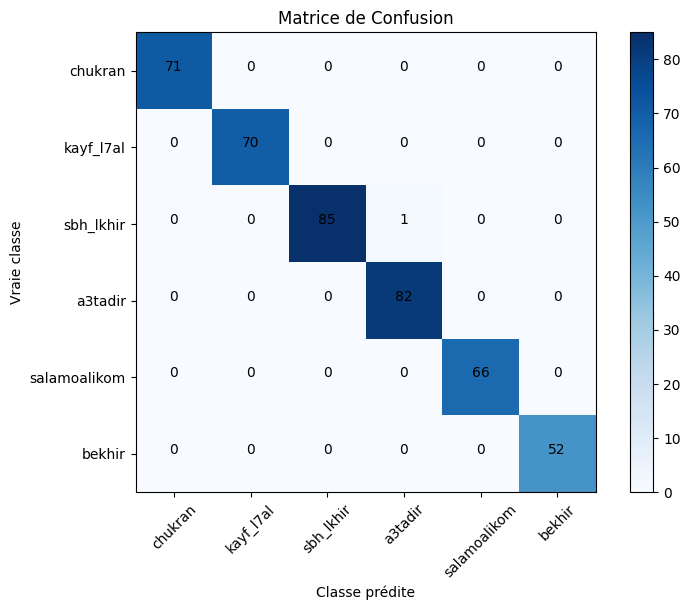

In [ ]:
# Création de la matrice de confusion
confusion = confusion_matrix(y_true, y_pred)

# Création de la figure
plt.figure(figsize=(8, 6))

# Création du plot de la matrice de confusion
plt.imshow(confusion, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Matrice de Confusion")
plt.colorbar()

# Ajout des étiquettes des classes
classes = signs
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Normalisation des valeurs de la matrice de confusion
confusion_normalized = confusion.astype('float') / confusion.sum(axis=1)[:, np.newaxis]

# Ajout des valeurs dans les cellules
thresh = confusion.max() / 2.
for i, j in itertools.product(range(confusion.shape[0]), range(confusion.shape[1])):
    plt.text(j, i, "{:,}".format(confusion[i, j]),
             horizontalalignment="center",
             color="white" if confusion_normalized[i, j] > thresh else "black")

# Configuration des axes
plt.tight_layout()
plt.ylabel('Vraie classe')
plt.xlabel('Classe prédite')

# Affichage du diagramme de matrice de confusion
plt.show()


**Hybdid GRU-LSTM**

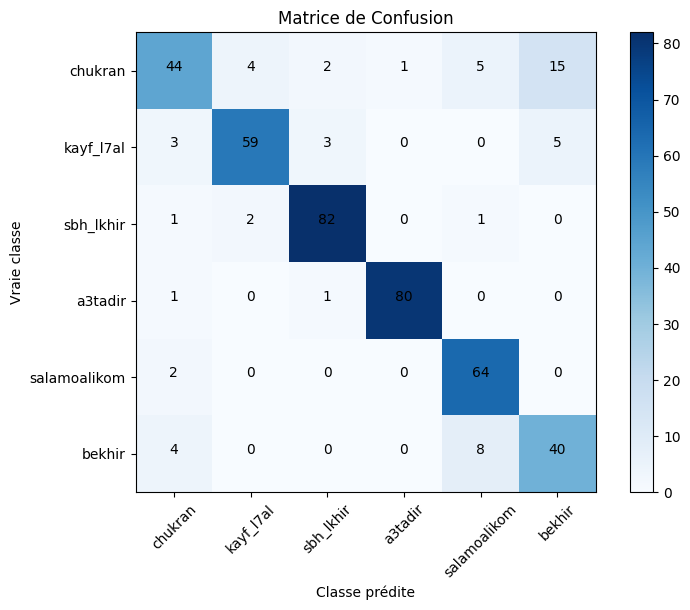

In [ ]:
# Création de la matrice de confusion
confusion = confusion_matrix(y_true, y_pred1)

# Création de la figure
plt.figure(figsize=(8, 6))

# Création du plot de la matrice de confusion
plt.imshow(confusion, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Matrice de Confusion")
plt.colorbar()

# Ajout des étiquettes des classes
classes = signs
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Normalisation des valeurs de la matrice de confusion
confusion_normalized = confusion.astype('float') / confusion.sum(axis=1)[:, np.newaxis]

# Ajout des valeurs dans les cellules
thresh = confusion.max() / 2.
for i, j in itertools.product(range(confusion.shape[0]), range(confusion.shape[1])):
    plt.text(j, i, "{:,}".format(confusion[i, j]),
             horizontalalignment="center",
             color="white" if confusion_normalized[i, j] > thresh else "black")

# Configuration des axes
plt.tight_layout()
plt.ylabel('Vraie classe')
plt.xlabel('Classe prédite')

# Affichage du diagramme de matrice de confusion
plt.show()

**LSTM**

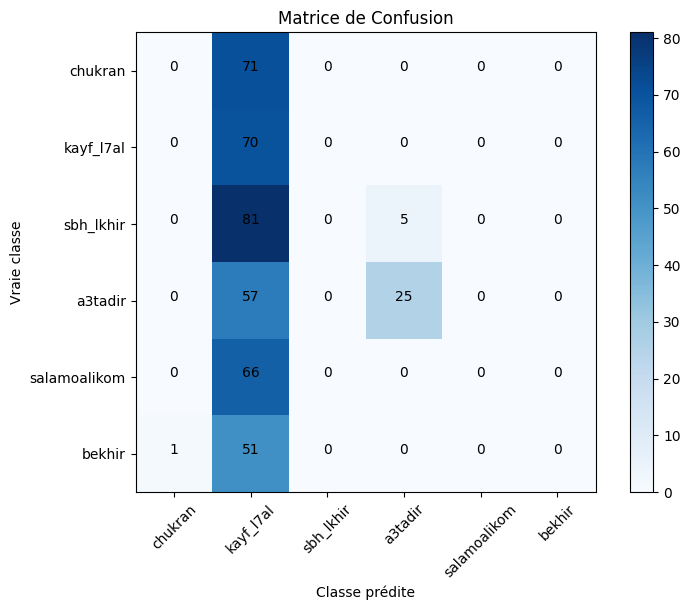

In [ ]:
# Création de la matrice de confusion
confusion = confusion_matrix(y_true, y_pred2)

# Création de la figure
plt.figure(figsize=(8, 6))

# Création du plot de la matrice de confusion
plt.imshow(confusion, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Matrice de Confusion")
plt.colorbar()

# Ajout des étiquettes des classes
classes = signs
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Normalisation des valeurs de la matrice de confusion
confusion_normalized = confusion.astype('float') / confusion.sum(axis=1)[:, np.newaxis]

# Ajout des valeurs dans les cellules
thresh = confusion.max() / 2.
for i, j in itertools.product(range(confusion.shape[0]), range(confusion.shape[1])):
    plt.text(j, i, "{:,}".format(confusion[i, j]),
             horizontalalignment="center",
             color="white" if confusion_normalized[i, j] > thresh else "black")

# Configuration des axes
plt.tight_layout()
plt.ylabel('Vraie classe')
plt.xlabel('Classe prédite')

# Affichage du diagramme de matrice de confusion
plt.show()

**Comparaison des accuracies**

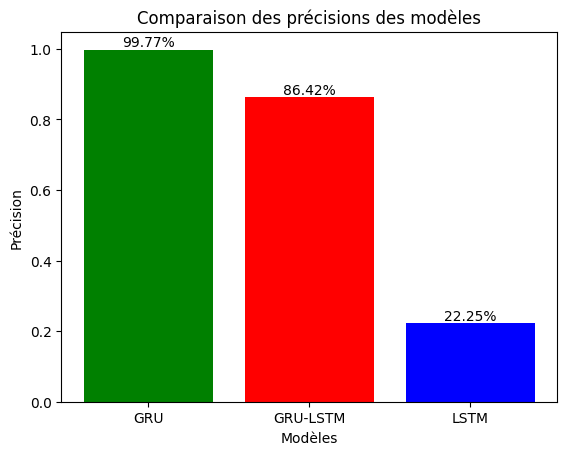

In [ ]:
##ploting ,mn b3d
import matplotlib.pyplot as plt

# Évaluer le premier modèle
score_model1 = model.evaluate(X_test, y_test, verbose=0)
loss_model1 = score_model1[0]
accuracy_model1 = score_model1[1]

# Évaluer le deuxième modèle
score_model2 = model1.evaluate(X_test, y_test, verbose=0)
loss_model2 = score_model2[0]
accuracy_model2 = score_model2[1]

# Évaluer le troisième modèle
score_model3 = model2.evaluate(X_test, y_test, verbose=0)
loss_model3 = score_model3[0]
accuracy_model3 = score_model3[1]

# Précisions des modèles
accuracies = [accuracy_model1, accuracy_model2, accuracy_model3]
models = ['GRU', 'GRU-LSTM', 'LSTM']
colors = ['green', 'red', 'blue']

plt.bar(models, accuracies, color=colors)
plt.xlabel('Modèles')
plt.ylabel('Précision')
plt.title('Comparaison des précisions des modèles')


for i, acc in enumerate(accuracies):
    plt.text(i, acc, f'{acc*100:.2f}%', ha='center', va='bottom')

plt.show()